In [1]:
import sys
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from matplotlib.patches import Rectangle
from sklearn import preprocessing
data_lib = pd.read_csv("Data/Library_1st_floor_results.csv") 
data_cafe = pd.read_csv("Data/Cafeteria_2_results.csv") 
data_st = pd.read_csv("Data/Stieltjesweg_results.csv") 
data_mdr = pd.read_csv("Data/MDRatnight_results.csv") 

# Preview the first 5 lines of the loaded data 
#data.head()

#if sys.argv[1].endswith('.csv'):
#    sys.argv[1] = sys.argv[1][:-4]
#data = pd.read_csv(sys.argv[1]+'.csv') 


In [2]:
'''
print('The number of frames that were captured: ', data['frame.number'].count(), ' frames')
print('The largest frame that was captured: ', data['frame.len'].max(), ' bytes')
print('The smallest frame that was captured: ', data['frame.len'].min(), ' bytes')
print('The lowest radio signal strength: ', data['wlan_radio.signal_dbm'].max(),' dBm')
print('The highest radio signal strength: ', data['wlan_radio.signal_dbm'].min(),' dBm')
'''

"\nprint('The number of frames that were captured: ', data['frame.number'].count(), ' frames')\nprint('The largest frame that was captured: ', data['frame.len'].max(), ' bytes')\nprint('The smallest frame that was captured: ', data['frame.len'].min(), ' bytes')\nprint('The lowest radio signal strength: ', data['wlan_radio.signal_dbm'].max(),' dBm')\nprint('The highest radio signal strength: ', data['wlan_radio.signal_dbm'].min(),' dBm')\n"

### Direction of Data Flow

In [59]:
def get_direction(data):
    #Which direction does the data flow (number of Packets)?
    raw_direction = data['wlan.fc.ds'].value_counts().sort_index()
    #print(raw_direction)
 
    direction = [0] * 4
    i = 0
    for x in raw_direction:
        direction[i] = x
        i = i+1

    direction = (direction/data['frame.number'].count())*100
    print("In percentage: " + str(direction))
    return (direction)

In [74]:
direction_lib = get_direction(data_lib)
direction_cafe = get_direction(data_cafe)
direction_st = get_direction(data_st)
direction_mdr = get_direction(data_mdr)

sta_sta = [x[0] for x in (direction_lib,direction_cafe,direction_st,direction_mdr)]
sta_ap = [x[1] for x in (direction_lib,direction_cafe,direction_st,direction_mdr)]
ap_sta = [x[2] for x in (direction_lib,direction_cafe,direction_st,direction_mdr)]
ap_ap = [x[3] for x in (direction_lib,direction_cafe,direction_st,direction_mdr)]

print(sta_sta)
print(sta_ap)
print(ap_sta)
print(ap_ap)

In percentage: [79.95062597 15.2338567   4.71782914  0.09768818]
In percentage: [7.76695182e+01 9.00640485e+00 1.32517252e+01 7.23516705e-02]
In percentage: [62.07923356 21.75326544 16.16750101  0.        ]
In percentage: [9.80592049e+01 8.95751578e-02 1.85121993e+00 0.00000000e+00]
[79.95062597425712, 77.66951824123424, 62.0792335577421, 98.05920491383723]
[15.233856703338896, 9.006404845494732, 21.75326543529547, 0.08957515782289711]
[4.717829142673737, 13.25172524280876, 16.167501006962425, 1.8512199283398738]
[0.09768817973025265, 0.07235167046225827, 0.0, 0.0]


In percentage: [79.95062597 15.2338567   4.71782914  0.09768818]
In percentage: [7.76695182e+01 9.00640485e+00 1.32517252e+01 7.23516705e-02]
In percentage: [62.07923356 21.75326544 16.16750101  0.        ]
In percentage: [9.80592049e+01 8.95751578e-02 1.85121993e+00 0.00000000e+00]


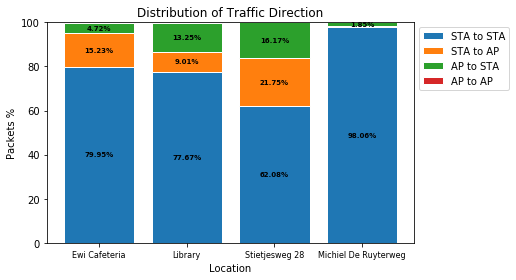

In [84]:
#Plot the distribution:
frame_direction = ['STA to STA','STA to AP','AP to STA','AP to AP']

direction_lib = get_direction(data_lib)
direction_cafe = get_direction(data_cafe)
direction_st = get_direction(data_st)
direction_mdr = get_direction(data_mdr)

locations = ['Ewi Cafeteria','Library','Stietjesweg 28','Michiel De Ruyterweg']

#totals = [i+j+k+l for i,j,k,l in zip(direction_lib,direction_cafe,direction_st,direction_mdr)]
#direction_lib = [i / j * 100 for i,j in zip(direction_lib, totals)]
#direction_cafe = [i / j * 100 for i,j in zip(direction_cafe, totals)]
#direction_st = [i / j * 100 for i,j in zip(direction_st, totals)]
#direction_mdr = [i / j * 100 for i,j in zip(direction_mdr, totals)]

pos = np.arange(len(frame_direction))
plot1 = plt.bar(pos,sta_sta, width=0.8, color=['#1F77B4'],
                edgecolor='white', label=frame_direction[0])
plot2 = plt.bar(pos,sta_ap, bottom=sta_sta, width=0.8, color=['#FF7F0E'],
                edgecolor='white',label=frame_direction[1])
plot3 = plt.bar(pos,ap_sta, bottom=[i+j for i,j in zip(sta_sta, sta_ap)], width=0.8, 
                color=['#2CA02C'],edgecolor='white',label=frame_direction[2])
plot4 = plt.bar(pos,ap_ap, bottom=[i+j+k for i,j,k in zip(sta_sta, sta_ap,ap_sta)], width=0.8, 
                color=['#D62728'],edgecolor='white',label=frame_direction[3])

plt.title("Distribution of Traffic Direction")
plt.xlabel("Location")
plt.ylabel("Packets %")

def autolabel_vertical(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.0*height, '%0.2f%%' % (height),
                ha='center', va='center')

def autolabel_horizontal(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        width = rect.get_width()
        if width >50:
            plt.text(rect.get_x() + rect.get_width()+1, rect.get_y() + rect.get_height()/2.,
                '%.2f%%' % width, ha='left', va='center', color='white',backgroundcolor='grey')
        else:
            plt.text(rect.get_x() + rect.get_width()+1, rect.get_y() + rect.get_height()/2.,
                '%.2f%%' % width, ha='left', va='center', color='black')

def autolabel_stacked(plot1,plot2,plot3,plot4):
    for r1, r2, r3, r4 in zip(plot1,plot2,plot3,plot4):
        h1 = r1.get_height()
        h2 = r2.get_height()
        h3 = r3.get_height()
        h4 = r4.get_height()
        if h1 > 0.5:
            plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%.2f%%" % h1, 
                     ha="center", va="center", color="black", fontsize=7, fontweight="bold")
        if h2 > 0.5:
            plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%.2f%%" % h2, 
                     ha="center", va="center", color="black", fontsize=7, fontweight="bold")
        if h3 > 0.5:
            plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., "%.2f%%" % h3, 
                     ha="center", va="center", color="black", fontsize=7, fontweight="bold")
        if h4 > 0.5: 
            plt.text(r4.get_x() + r4.get_width() / 2., h1 + h2 +h3 + h4 / 2., "%.2f%%" % h4, 
                     ha="center", va="center", color="black", fontsize=7, fontweight="bold")

            
            
autolabel_stacked(plot1,plot2,plot3,plot4)

plt.xticks(pos,locations,rotation=0,fontsize=8)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

#plt.savefig(sys.argv[1]+'_Direction_.png',dpi=300,bbox_inches='tight')
#plt.legend((plot1[0], plot2[0]), ('Men', 'Women'))
plt.show()


### Distribution of Frame Types

In [85]:
# How many Packets are there for each Frame Type?
def get_type(data):
    raw_types= data['wlan.fc.type'].value_counts().sort_index()
    #print(raw_types)

    types = [0]*4
    i = 0
    for x in raw_types:
        types[i] = x
        i = i+1

    types = (types/data['frame.number'].count())*100
    #print('In Percentage: ' + str(types))
    return (types)

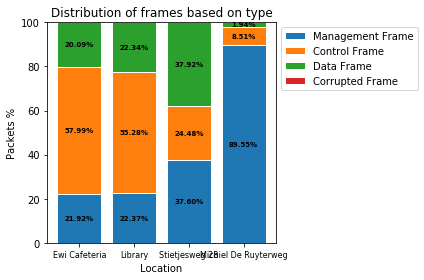

In [91]:
#Plot the distribution:
frame_types = ['Management Frame','Control Frame','Data Frame','Corrupted Frame']

type_lib = get_type(data_lib)
type_cafe = get_type(data_cafe)
type_st = get_type(data_st)
type_mdr = get_type(data_mdr)

m_frames = [x[0] for x in (type_lib,type_cafe,type_st,type_mdr)]
c_frames = [x[1] for x in (type_lib,type_cafe,type_st,type_mdr)]
d_frames = [x[2] for x in (type_lib,type_cafe,type_st,type_mdr)]
corrupted_frames = [x[3] for x in (type_lib,type_cafe,type_st,type_mdr)]

pos = np.arange(len(frame_types))

#plot2 = plt.barh(pos, types, align='center', color=['#1F77B4','#FF7F0E','#2CA02C','#D62728'])
plot1 = plt.bar(pos,m_frames, width=0.8, color=['#1F77B4'],
                edgecolor='white', label=frame_types[0])
plot2 = plt.bar(pos,c_frames, bottom=m_frames, width=0.8, color=['#FF7F0E'],
                edgecolor='white',label=frame_types[1])
plot3 = plt.bar(pos,d_frames, bottom=[i+j for i,j in zip(m_frames, c_frames)], width=0.8, 
                color=['#2CA02C'],edgecolor='white',label=frame_types[2])
plot4 = plt.bar(pos,corrupted_frames, bottom=[i+j+k for i,j,k in zip(m_frames,c_frames,d_frames)], width=0.8, 
                color=['#D62728'],edgecolor='white',label=frame_types[3])


plt.title("Distribution of frames based on type")
plt.xlabel("Location")
plt.ylabel("Packets %")

autolabel_stacked(plot1,plot2,plot3,plot4)

plt.xticks(pos,locations,rotation=0,fontsize=8)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.tight_layout()
plt.savefig(sys.argv[1]+'_Types_.png',dpi=300,bbox_inches='tight')
plt.show()


### Distribution of Sub-Frame Types

In [19]:
# How many Packets are there for each SubFrame Type?
#print(data.groupby('wlan.fc.type')['wlan.fc.subtype'].value_counts().sort_index())

df0 = data[(data['wlan.fc.type'] == 0)]
df1 = data[(data['wlan.fc.type'] == 1)]
df2 = data[(data['wlan.fc.type'] == 2)]

raw_sub0 = df0['wlan.fc.subtype'].value_counts().sort_index()
raw_sub1 = df1['wlan.fc.subtype'].value_counts().sort_index()
raw_sub2 = df2['wlan.fc.subtype'].value_counts().sort_index()

sub0_int = [0]* 15
sub1_int = [0]* 16
sub2_int = [0]* 16

print(raw_sub0)
print(raw_sub1)
print(raw_sub2)

for i in range(len(sub0_int)):
    sub0_int[i] = raw_sub0.get(i)

sub0_int = [0 if v is None else v for v in sub0_int]
print(sub0_int)

for i in range(len(sub1_int)):
    sub1_int[i] = raw_sub1.get(i)
    
sub1_int = [0 if v is None else v for v in sub1_int]
print(sub1_int)

for i in range(len(sub2_int)):
    sub2_int[i] = raw_sub2.get(i)
    
sub2_int = [0 if v is None else v for v in sub2_int]
print(sub2_int)

#subtypes = list(data.groupby('wlan.fc.type')['wlan.fc.subtype'].value_counts().sort_index())
sub0 = (sub0_int/data['frame.number'].count())*100
sub1 = (sub1_int/data['frame.number'].count())*100
sub2 = (sub2_int/data['frame.number'].count())*100

print(sub0)
print(sub1)
print(sub2)


0         1
1         1
4       251
5      2254
8     30279
11        2
12        1
13       10
Name: wlan.fc.subtype, dtype: int64
8        20
9     13013
10        2
11    14569
12    12179
13     4284
Name: wlan.fc.subtype, dtype: int64
0     1206
4      444
8     5825
12    1540
Name: wlan.fc.subtype, dtype: int64
[1, 1, 0, 0, 251, 2254, 0, 0, 30279, 0, 0, 2, 1, 10, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 20, 13013, 2, 14569, 12179, 4284, 0, 0]
[1206, 0, 0, 0, 444, 0, 0, 0, 5825, 0, 0, 0, 1540, 0, 0, 0]
[1.16440190e-03 1.16440190e-03 0.00000000e+00 0.00000000e+00
 2.92264878e-01 2.62456189e+00 0.00000000e+00 0.00000000e+00
 3.52569253e+01 0.00000000e+00 0.00000000e+00 2.32880381e-03
 1.16440190e-03 1.16440190e-02 0.00000000e+00]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.32880381e-02 1.51523620e+01 2.32880381e-03 1.69641714e+01
 1.41812508e+01 4.98829776e+00 0.00000000e+00 0.00000000e+00]
[1.4042687  0.         0

In [20]:
pos0 = np.arange(len(sub0))
pos1 = np.arange(len(sub1))+len(sub0)
pos2 = np.arange(len(sub2))+len(sub0) + len(sub1)
print(pos0)
print(pos1)
print(pos2)

pos = np.arange(len(sub0)+len(sub1)+len(sub2))
print(pos)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]
[31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]


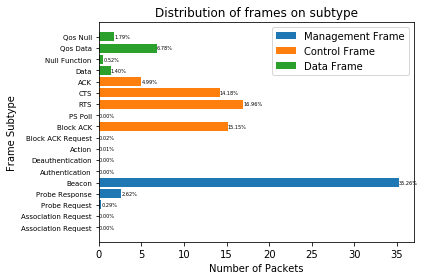

In [21]:
#Plot the distribution:
frame_subtypes_0 = ['Association Request','Association Request', 'Reassociation Request','Reassociation Response', 
                    'Probe Request', 'Probe Response','NA','NA','Beacon','ATIM','Disassociation','Authentication',
                    'Deauthentication','Action','Action-no ACK']
frame_subtypes_1 = ['Reserved','Reserved','Reserved','Reserved','Reserved','Reserved','Reserved',
                    'Control Wrapper','Block ACK Request','Block ACK','PS Poll',
                    'RTS','CTS','ACK','CF-End','CF-End+CF+ACK']
frame_subtypes_2 = ['Data',
                    'Data+CF-ACK',
                    'Data+CF-Poll',
                    'Data+CF-ACK+CF-Poll',
                    'Null Function',
                    'CF-ACK',
                    'CF-Poll',
                    'CF-ACK+CF-Poll',
                    'Qos Data',
                    'NA',
                    'Qos Data+CF-Poll',
                    'Qos Data+CF-ACK+CF-Poll',
                    'Qos Null',
                    'Reserved Data Frame',
                    'Qos CF-Poll',
                    'Qos CF-ACK+CF-Poll']

for i in range(len(sub0_int)):
        if sub0_int[i]== 0:
            frame_subtypes_0[i] = '' 

for i in range(len(sub1_int)):
        if sub1_int[i]== 0:
            frame_subtypes_1[i] = '' 

for i in range(len(sub2_int)):
        if sub2_int[i]== 0:
            frame_subtypes_2[i] = '' 


sub0 = [y for y in sub0 if y != 0]            
sub1 = [y for y in sub1 if y != 0]            
sub2 = [y for y in sub2 if y != 0]            
frame_subtypes_0 = [y for y in frame_subtypes_0 if y != '']            
frame_subtypes_1 = [y for y in frame_subtypes_1 if y != '']            
frame_subtypes_2 = [y for y in frame_subtypes_2 if y != '']            

frame_subtype = frame_subtypes_0+frame_subtypes_1+frame_subtypes_2

pos0 = np.arange(len(sub0))
pos1 = np.arange(len(sub1))+len(sub0)
pos2 = np.arange(len(sub2))+len(sub0) + len(sub1)

pos = np.arange(len(sub0)+len(sub1)+len(sub2))

#data.groupby('wlan.fc.type')['wlan.fc.subtype'].value_counts().sort_index().unstack().plot(kind='bar',stacked=True)
#data.groupby('wlan.fc.type')['wlan.fc.subtype'].value_counts().sort_index().unstack().plot(kind='bar')
#data.groupby('wlan.fc.type')['wlan.fc.subtype'].value_counts().sort_index().plot(kind='bar')

label1 = plt.barh(pos0, sub0, align='center')
label2 = plt.barh(pos1, sub1, align='center')
label3 = plt.barh(pos2, sub2, align='center')

plt.title("Distribution of frames on subtype")
plt.ylabel("Frame Subtype")
plt.xlabel("Number of Packets")
plt.yticks(pos,frame_subtype ,rotation=0,fontsize=7)
#plt.xticks(rotation=0,fontsize=5)

def autolabel_sp(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        width = rect.get_width()
        plt.text(rect.get_x() + rect.get_width(), rect.get_y() + rect.get_height()/2.,
                '%.2f%%' % width, ha='left', va='center', color='black', size=5)

autolabel_sp(label1)
autolabel_sp(label2)
autolabel_sp(label3)

plt.legend(frame_types)
plt.tight_layout()
plt.savefig(sys.argv[1]+'_SubTypes_.png',dpi=300,bbox_inches='tight')
plt.show()



### Distribution of Qos Priority Types (in QoS Control Flags)

In [22]:
#What QoS does the data flows have?
raw_qos = data['wlan.qos.priority'].value_counts().sort_index()
print(raw_qos)
 
qos = [0] * 8
for x in raw_qos:
    qos[int(raw_qos[raw_qos == x].index[0])] = x

for i in range(len(qos)):
    qos[i] = raw_qos.get(i)

qos = [0 if v is None else v for v in qos]
print(qos)

total_qos_frames = sum(qos)
for x in qos:
    qos[qos.index(x)] = (x/total_qos_frames)*100
print('In percentage: ' + str(qos))


0.0    6097
1.0      15
3.0       9
4.0     176
6.0    1068
Name: wlan.qos.priority, dtype: int64
[6097, 15, 0, 9, 176, 0, 1068, 0]
In percentage: [82.78343516632722, 0.20366598778004072, 0.0, 0.12219959266802445, 2.389680923285811, 0, 14.5010183299389, 0]


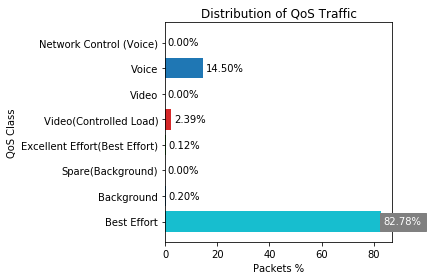

In [23]:
#Plot the distribution:
QoS_types = ['Best Effort','Background','Spare(Background)','Excellent Effort(Best Effort)',
             'Video(Controlled Load)','Video','Voice','Network Control (Voice)']
pos = np.arange(len(QoS_types))

plot4 = plt.barh(pos, qos, align='center', color=['#17BECF','#1F77B4','#FF7F0E','#2CA02C','#D62728'])

plt.title("Distribution of QoS Traffic")
plt.ylabel("QoS Class")
plt.xlabel("Packets %")
plt.yticks(pos,QoS_types,rotation=0)
autolabel(plot4)
plt.tight_layout()
plt.savefig(sys.argv[1]+'_QoSPriority_.png',dpi=300,bbox_inches='tight')
plt.show()


### Distribution of Data Length with Time and with Number of Packets

In [ ]:
'''
#Max data transferred in a packet(bytes)
print('Max data: ' + str(data['data.len'].max()))

#Min data transferred in a packet(bytes)
print('Min data: ' + str(data['data.len'].min()))

raw_data_len = data['data.len'].value_counts().sort_index()

#raw_data_len.index

#data_len = (raw_data_len/(data['data.len'].value_counts().sum()))*100

#print("In Percentage:" + str(raw_data_len))

x = data[['data.len']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)


df_normalized.dropna().plot(kind='hist')
'''

In [ ]:
'''
#Plot the distribution of data length (bytes):

#n, bins, patches = plt.hist(raw_data_len,raw_data_len.index , normed=1, facecolor='blue', alpha=0.5)
raw_data_len.hist(bins=raw_data_len.index)
#data[['data.len']].plot(kind='hist',bins=bin1,rwidth=0.8)

#plot5 = plt.hist(raw_data_len,bins=bin1, color=['orange'])
#plot5 = plt.bar(x=pos, height=qos, width=0.5, align='center', color=['#17BECF','#1F77B4','#FF7F0E','#2CA02C','#D62728'])

plt.title("Distribution of Data Traffic")
plt.xlabel("Size of Data Packets(bytes)")
plt.ylabel("Number of Packets")
#plt.yticks(range(1, 100))
#plt.xticks(range(1, 100))

plt.show()
'''

In [ ]:
'''
#Packet Size over Time
plt.plot(data['frame.time_relative'], data['data.len'])

#bin1 = [i for i in range(0,1600,100)]
#data[['data.len']].plot(kind='hist',bins=bin1,rwidth=0.8)
plt.show()
'''

### Distribution of Data Rates with RSSI

In [ ]:
'''
data[(data['wlan_radio.signal_dbm'] > -60) & (data['wlan_radio.phy'] == 4)]['wlan_radio.data_rate']

#Packet Size over Time
plt.scatter(data['wlan_radio.signal_dbm'], data['wlan_radio.data_rate'],marker='X',s=1**2)

#bin1 = [i for i in range(0,1600,100)]
#data[['data.len']].plot(kind='hist',bins=bin1,rwidth=0.8)
plt.show()
'''